### k-近傍法
+ 教師あり学習
+ 学習データにおいて，入力データの最近傍k個のデータの最も多く所属するクラスに分類
 - 同じ学習データであってもkの値によって分類されるクラスが変化することもある
+ 学習データと入力データとの距離計算
 - 分枝法
    - 学習データを木構造のクラスタを作成．
    - 各ノードにはノード以下全体の平均ベクトルと平均ベクトルからの最大距離を属性を保持
  - 限定法
    - 分枝法を利用する
    - 木構造から最も近いクラスタを探索

【参考文献】
1. はじめてのパターン認識

  https://www.slideshare.net/moa108/5-kknn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1 # 50サンプルを正規分布で生成し，25*2の配列に変換後-1．分布の平均を0から-1にしたのと同じ
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1. # 50サンプルを正規分布で生成し，25*2の配列に変換後+1．分布の平均を0から1にしたのと同じ
    x_train = np.concatenate([x0, x1]) # concatenate:配列の結合．2つの2次元配列を縦に結合，50*2の配列
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

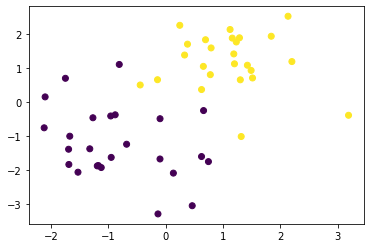

In [ ]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

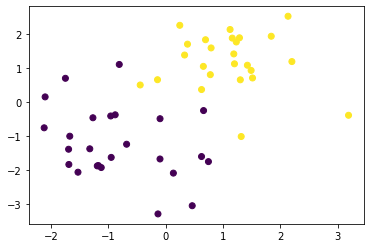

In [ ]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

In [ ]:
ys_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])